In [ ]:
!unzip "/content/histopathological image dataset for ET.zip" -d "/content/dataset"

unzip:  cannot find or open /content/histopathological image dataset for ET.zip, /content/histopathological image dataset for ET.zip.zip or /content/histopathological image dataset for ET.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace 'dataset' with your actual extracted folder name
!cp -r "/content/dataset" "/content/drive/MyDrive/"

cp: cannot stat '/content/dataset': No such file or directory


In [ ]:
!cp -r "/content/drive/MyDrive/dataset" "/content/"  # Change 'dataset' to your folder name

Class names: ['histopathological image dataset for ET']
Number of classes: 1

Sample items:
Image 1: /content/dataset/histopathological image dataset for ET/EA/1510326ги2гк.JPG -> Label: histopathological image dataset for ET
Image 2: /content/dataset/histopathological image dataset for ET/EA/1510326ги3гк.JPG -> Label: histopathological image dataset for ET
Image 3: /content/dataset/histopathological image dataset for ET/EA/1510880.JPG -> Label: histopathological image dataset for ET


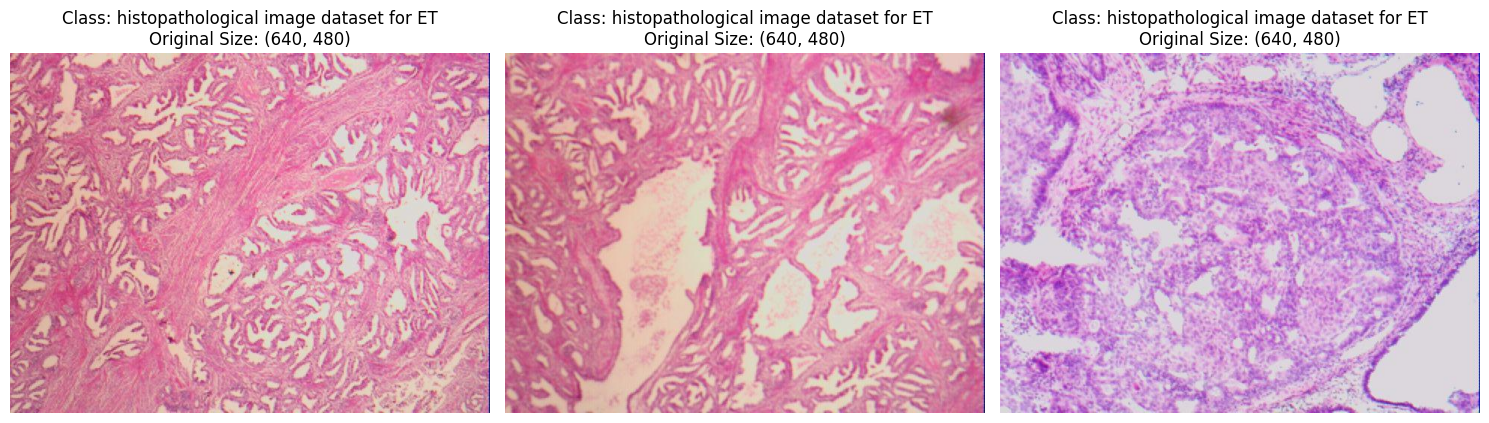

In [ ]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define dataset path (update if your path is different)
dataset_path = "/content/dataset"

# Load raw dataset (no transformations yet)
raw_dataset = datasets.ImageFolder(
    root=dataset_path,
    transform=None  # We'll add preprocessing later
)

# Check class names and counts
class_names = raw_dataset.classes
print("Class names:", class_names)
print("Number of classes:", len(class_names))

# Show sample image paths and labels
print("\nSample items:")
for i, (path, label) in enumerate(raw_dataset.samples[:3]):  # First 3 samples
    print(f"Image {i+1}: {path} -> Label: {class_names[label]}")

# Visualize raw images (before preprocessing)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    img, label = raw_dataset[i]  # PIL Image
    ax.imshow(img)
    ax.set_title(f"Class: {class_names[label]}\nOriginal Size: {img.size}")
    ax.axis('off')
plt.tight_layout()
plt.show()


Total images loaded: 3299
Class distribution:
EH (Complex): 282 images
NE (Menstrual): 21 images
NE (Luteal): 600 images
EA: 532 images
NE (Follicular): 712 images
EP: 636 images
EH (Simple): 516 images


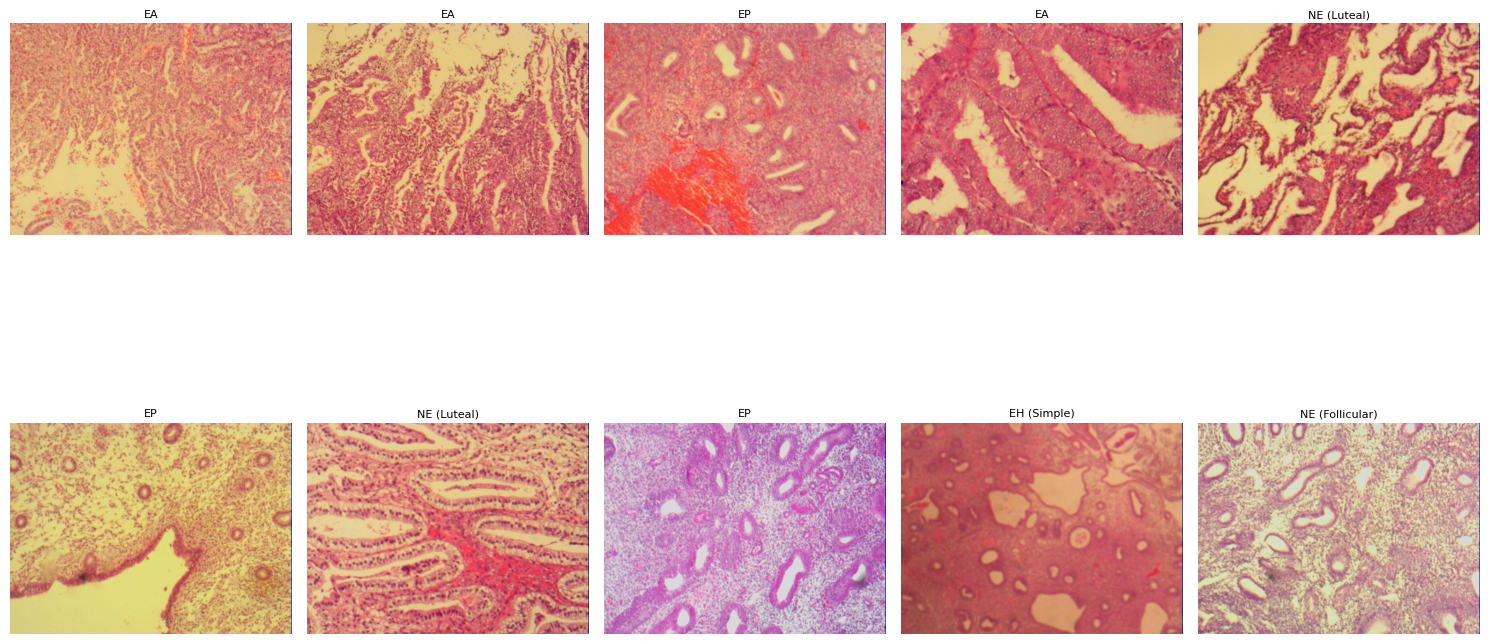

In [ ]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

# Set your dataset path
dataset_dir = r'/content/dataset/histopathological image dataset for ET'

# Label mapping with nested structure
label_map = {
    'EA': 'EA',
    'EP': 'EP',
    'EH/Complex': 'EH (Complex)',
    'EH/Simple': 'EH (Simple)',
    'NE/Follicular': 'NE (Follicular)',
    'NE/Luteal': 'NE (Luteal)',
    'NE/Menstrual': 'NE (Menstrual)'
}

# List to store (image, label) tuples
loaded_data = []

# Traverse each folder and load images
for label_path, label_name in label_map.items():
    class_path = os.path.join(dataset_dir, *label_path.split('/'))

    if not os.path.exists(class_path):
        print(f"Warning: {class_path} not found!")
        continue

    for file in os.listdir(class_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
            img_path = os.path.join(class_path, file)

            try:
                image = Image.open(img_path).convert('RGB')
                loaded_data.append((image, label_name))
            except Exception as e:
                print(f"Skipping corrupted image {file}: {str(e)}")

print(f"\nTotal images loaded: {len(loaded_data)}")
print("Class distribution:")
for class_name in set(label_map.values()):
    count = sum(1 for _, label in loaded_data if label == class_name)
    print(f"{class_name}: {count} images")

# Display 10 random samples
plt.figure(figsize=(15, 10))
for i in range(min(10, len(loaded_data))):
    img, label = random.choice(loaded_data)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(label, fontsize=8, pad=4)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# # Install any missing packages
# !pip install opencv-python-headless scikit-image

# def conservative_preprocess(image_path):
#     """Minimal preprocessing that preserves image quality"""
#     # 1. Load original image
#     original = cv2.imread(image_path)
#     if original is None:
#         return None, None, None

#     original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

#     # 2. Simple normalization (0-255 to 0-1)
#     normalized = original.astype(np.float32) / 255.0

#     # 3. Mild contrast adjustment (avoid extreme values)
#     adjusted = np.clip(normalized * 1.05 + 0.02, 0, 1)

#     # 4. Very gentle denoising (edge-preserving)
#     denoised = cv2.bilateralFilter(
#         (adjusted * 255).astype(np.uint8),
#         d=3,  # Very small kernel
#         sigmaColor=10,
#         sigmaSpace=10
#     ).astype(np.float32) / 255.0

#     # Convert back to 8-bit
#     processed = (denoised * 255).astype(np.uint8)

#     # Calculate metrics
#     psnr_val = psnr(original, processed, data_range=255)
#     ssim_val = ssim(original, processed,
#                    data_range=255,
#                    channel_axis=2,
#                    win_size=3)  # Small window for local features

#     return original, processed, (psnr_val, ssim_val)

# # Test with sample images
# sample_paths = random.sample(image_paths, 3)
# plt.figure(figsize=(15, 10))

# for i, path in enumerate(sample_paths):
#     original, processed, metrics = conservative_preprocess(path)
#     if original is None:
#         continue

#     class_name = os.path.basename(os.path.dirname(path))

#     # Plot original
#     plt.subplot(3, 2, 2*i+1)
#     plt.imshow(original)
#     plt.title(f"Original\n{class_name}", pad=10)
#     plt.axis('off')

#     # Plot processed
#     plt.subplot(3, 2, 2*i+2)
#     plt.imshow(processed)
#     plt.title(f"Processed\nPSNR: {metrics[0]:.2f} dB\nSSIM: {metrics[1]:.4f}", pad=10)
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

NameError: name 'image_paths' is not defined

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # For progress bars

def process_entire_dataset(input_dir, output_dir):
    """
    Applies conservative_preprocess to all images in the dataset
    while preserving the original folder structure
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Initialize counters
    processed_count = 0
    skipped_count = 0

    # Walk through directory structure
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding output directory
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)

        # Process each image
        for file in tqdm(files, desc=f"Processing {rel_path}"):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                input_path = os.path.join(root, file)
                output_path = os.path.join(output_subdir, file)

                # Apply your preprocessing
                _, processed, _ = conservative_preprocess(input_path)

                if processed is not None:
                    # Save processed image (as JPEG to save space)
                    cv2.imwrite(output_path, cv2.cvtColor(processed, cv2.COLOR_RGB2BGR))
                    processed_count += 1
                else:
                    print(f"\nSkipped corrupted image: {input_path}")
                    skipped_count += 1

    print(f"\nProcessing complete!")
    print(f"Successfully processed: {processed_count} images")
    print(f"Skipped: {skipped_count} images")

# Example usage:
input_directory = "/content/dataset"  # Path to your original dataset
output_directory = "/content/processed_dataset"  # Where to save processed images

process_entire_dataset(input_directory, output_directory)

Processing .: 0it [00:00, ?it/s]
Processing histopathological image dataset for ET: 0it [00:00, ?it/s]
Processing histopathological image dataset for ET/EH: 0it [00:00, ?it/s]
Processing histopathological image dataset for ET/EH/Simple: 100%|██████████| 517/517 [02:06<00:00,  4.09it/s]
Processing histopathological image dataset for ET/EH/Complex: 100%|██████████| 282/282 [01:08<00:00,  4.11it/s]
Processing histopathological image dataset for ET/NE: 0it [00:00, ?it/s]
Processing histopathological image dataset for ET/NE/Luteal: 100%|██████████| 601/601 [02:25<00:00,  4.14it/s]
Processing histopathological image dataset for ET/NE/Follicular: 100%|██████████| 713/713 [02:50<00:00,  4.18it/s]
Processing histopathological image dataset for ET/NE/Menstrual: 100%|██████████| 21/21 [00:04<00:00,  4.80it/s]
Processing histopathological image dataset for ET/EA: 100%|██████████| 533/533 [02:10<00:00,  4.10it/s]
Processing histopathological image dataset for ET/EP: 100%|██████████| 636/636 [02:24<


Processing complete!
Successfully processed: 3299 images
Skipped: 0 images


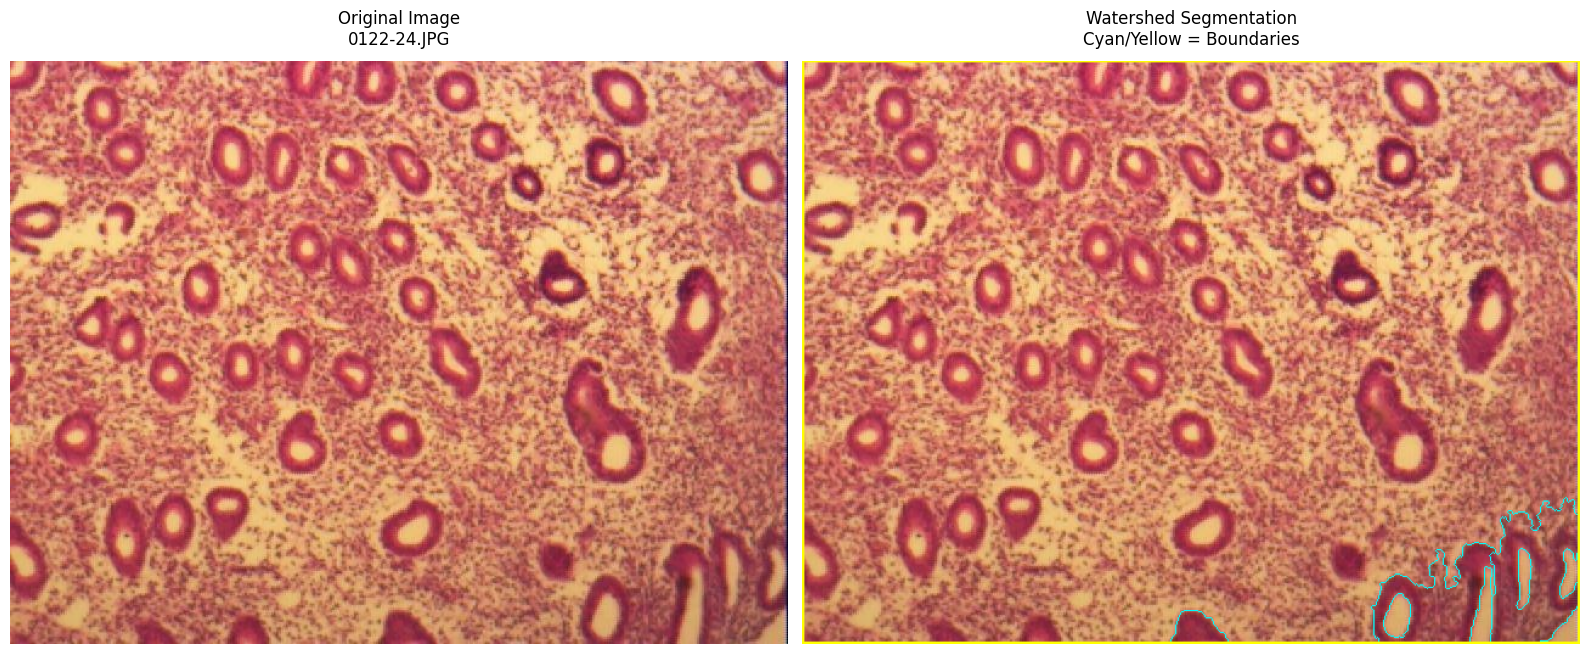

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def apply_visible_watershed(image):
    """Watershed segmentation with highly visible boundaries"""
    # Convert to BGR for OpenCV processing
    if len(image.shape) == 2:  # Grayscale
        image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:  # RGB
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Finding unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so background is 1 instead of 0
    markers += 1

    # Mark the unknown region with 0
    markers[unknown == 255] = 0

    # Apply watershed with thicker boundaries
    markers = cv2.watershed(image_bgr, markers)

    # Create highlighted version
    highlighted = image_bgr.copy()

    # Option 1: Draw thick cyan boundaries (better visibility)
    highlighted[markers == -1] = [255, 255, 0]  # Cyan

    # Option 2: Additional contour drawing for extra visibility
    boundary_mask = np.zeros_like(gray)
    boundary_mask[markers == -1] = 255
    contours, _ = cv2.findContours(boundary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(highlighted, contours, -1, (0, 255, 255), 2)  # Yellow contours

    # Convert back to RGB for display
    result = cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB)

    return result

def load_and_process_random_image(dataset_path):
    """Load random image and apply watershed"""
    # Get all image files
    image_files = []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
                image_files.append(os.path.join(root, file))

    if not image_files:
        print(f"No images found in {dataset_path}!")
        return None, None

    # Select random image
    img_path = random.choice(image_files)
    image = cv2.imread(img_path)

    if image is None:
        print(f"Could not read image: {img_path}")
        return None, None

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply watershed
    segmented = apply_visible_watershed(image_rgb)

    return image_rgb, segmented, img_path

# Main execution
dataset_path = "/content/processed_dataset"  # Your dataset path

# Load and process random image
original, segmented, img_path = load_and_process_random_image(dataset_path)

if original is not None:
    # Display results
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title(f"Original Image\n{os.path.basename(img_path)}", pad=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented)
    plt.title("Watershed Segmentation\nCyan/Yellow = Boundaries", pad=12)
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Failed to process image. Please check:")
    print(f"1. Directory exists: {os.path.exists(dataset_path)}")
    print("2. Contains valid images (PNG/JPG/JPEG/TIFF)")

Found 3299 images. Processing...

Sample Results:


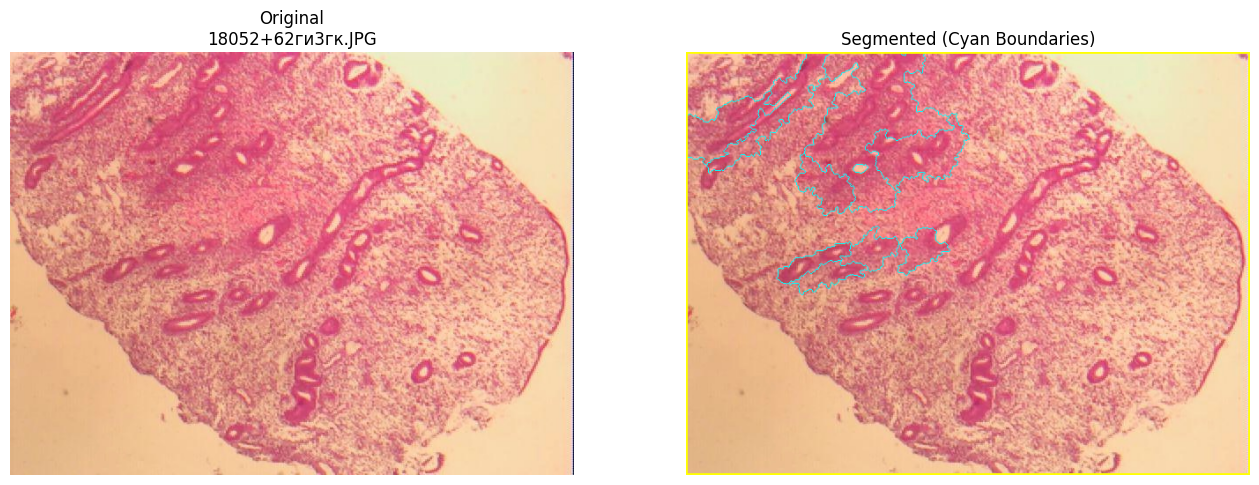

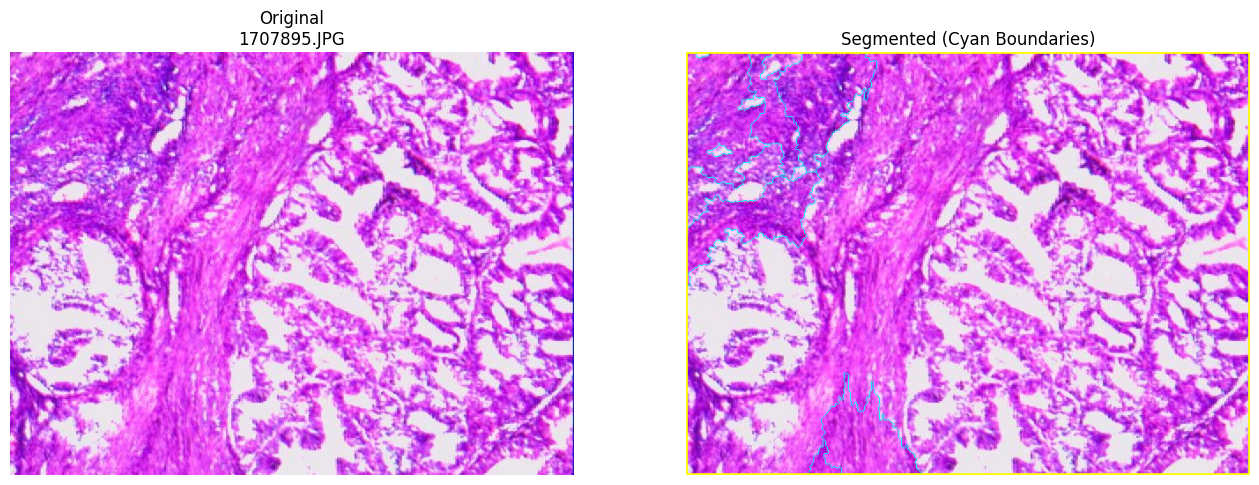

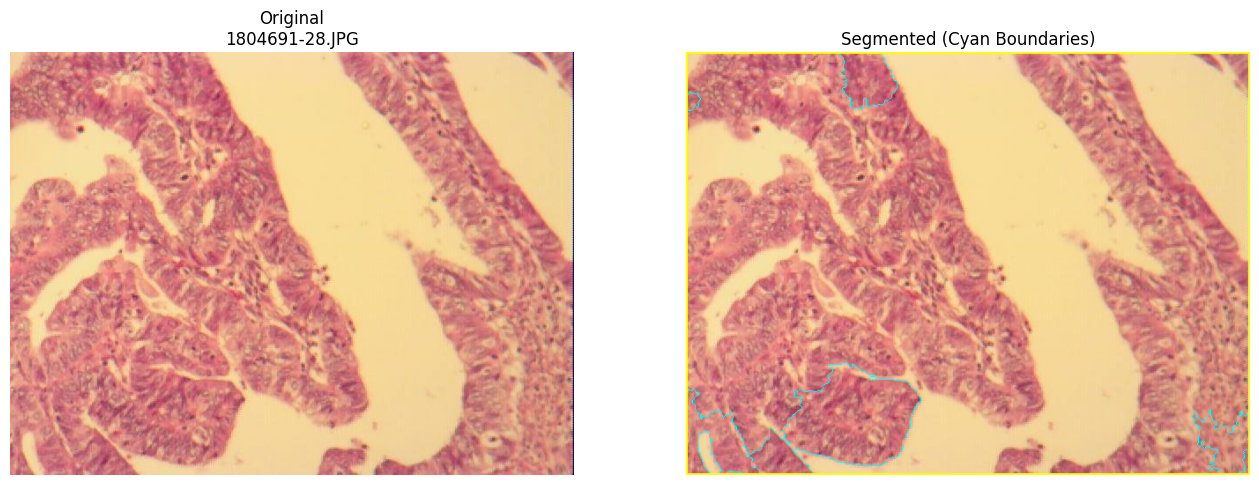


Processing full dataset...


Watershed Progress: 100%|██████████| 3299/3299 [01:57<00:00, 28.16it/s]


Processing complete! Results saved to /content/watershed_results
Total images processed: 3299
Sample results saved with 'sample_' prefix


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

def process_entire_dataset(input_dir, output_dir, display_samples=3):
    """
    Apply watershed to all images in processed dataset
    Args:
        input_dir: Path to processed images
        output_dir: Where to save watershed results
        display_samples: Number of sample results to show
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Get all image paths
    image_paths = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
                image_paths.append(os.path.join(root, file))

    if not image_paths:
        print(f"No images found in {input_dir}!")
        return

    print(f"Found {len(image_paths)} images. Processing...")

    # Process sample images first for visualization
    sample_paths = random.sample(image_paths, min(display_samples, len(image_paths)))
    print("\nSample Results:")
    for img_path in sample_paths:
        try:
            # Load and process image
            image = cv2.imread(img_path)
            if image is None:
                continue

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            segmented = apply_visible_watershed(image_rgb)

            # Display
            plt.figure(figsize=(16, 8))
            plt.subplot(1, 2, 1)
            plt.imshow(image_rgb)
            plt.title(f"Original\n{os.path.basename(img_path)}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(segmented)
            plt.title("Segmented (Cyan Boundaries)")
            plt.axis('off')

            plt.show()

            # Save sample
            sample_output_path = os.path.join(output_dir, f"sample_{os.path.basename(img_path)}")
            cv2.imwrite(sample_output_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))

        except Exception as e:
            print(f"Error processing sample {img_path}: {str(e)}")

    # Process all images with progress bar
    print("\nProcessing full dataset...")
    for img_path in tqdm(image_paths, desc="Watershed Progress"):
        try:
            # Skip already processed samples
            if img_path in sample_paths:
                continue

            image = cv2.imread(img_path)
            if image is None:
                continue

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            segmented = apply_visible_watershed(image_rgb)

            # Save result (preserve original filename)
            output_path = os.path.join(output_dir, os.path.basename(img_path))
            cv2.imwrite(output_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))

        except Exception as e:
            print(f"\nError processing {img_path}: {str(e)}")

    print(f"\nProcessing complete! Results saved to {output_dir}")
    print(f"Total images processed: {len(image_paths)}")
    print(f"Sample results saved with 'sample_' prefix")

# Configuration
processed_data_dir = "/content/processed_dataset"  # Your processed images
output_directory = "/content/watershed_results"    # Where to save results
sample_count = 3                                   # Number of samples to display

# Run the processing
process_entire_dataset(processed_data_dir, output_directory, sample_count)

Found 3299 images. Processing...

Displaying sample results:


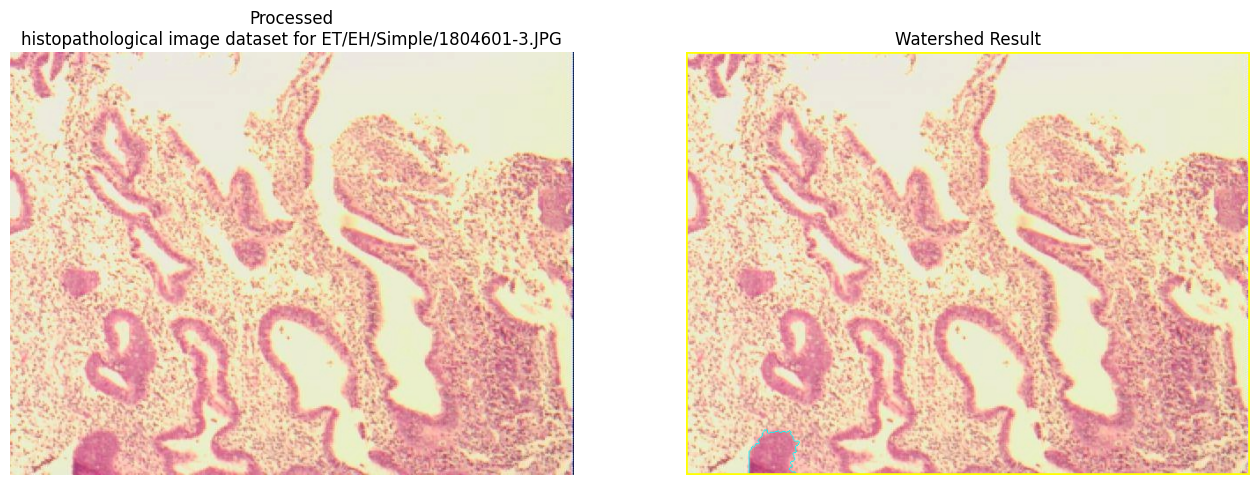

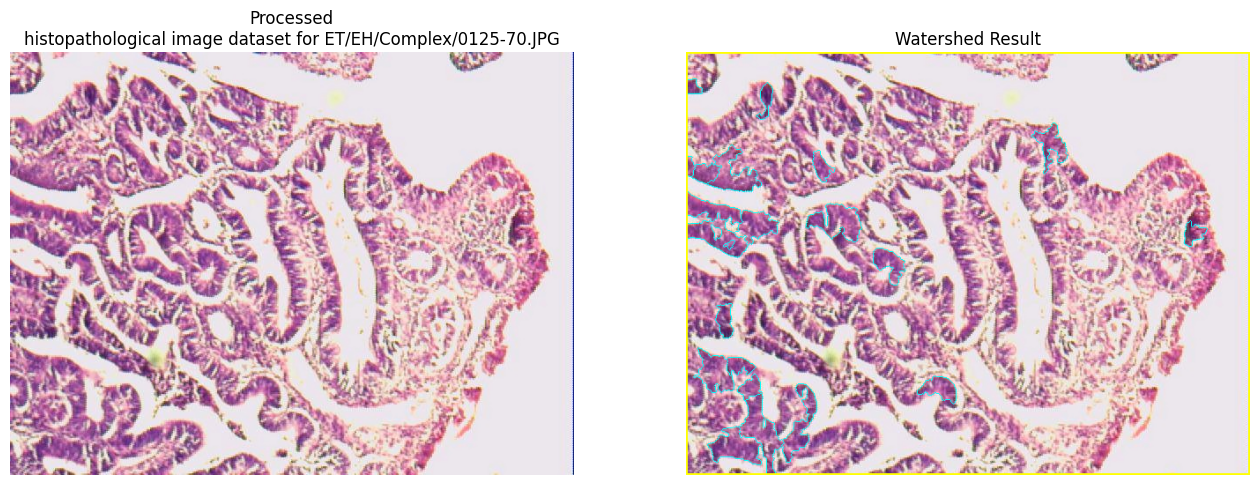

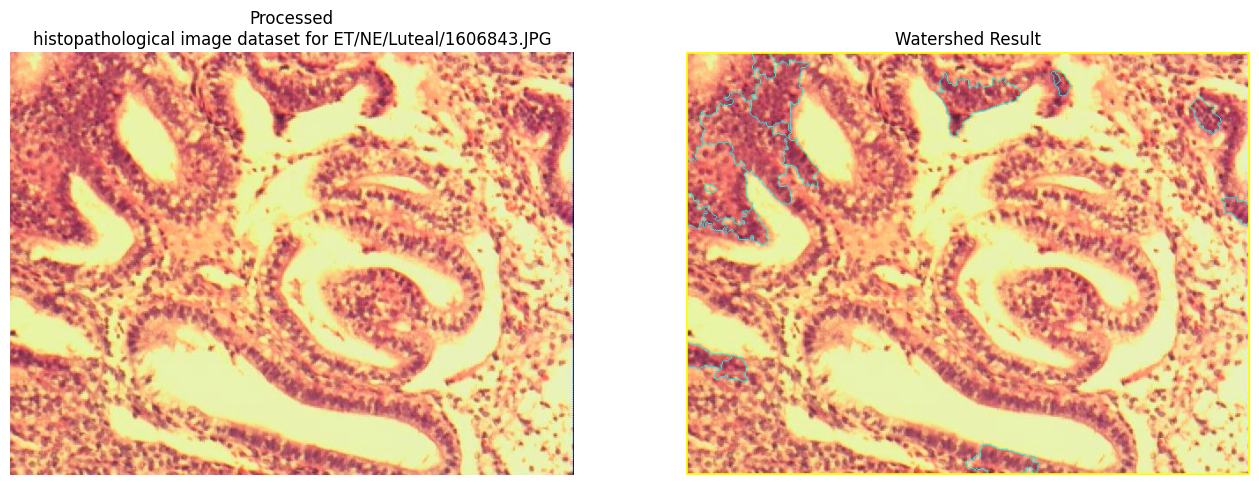


Processing full dataset with structure preservation...


Progress: 100%|██████████| 3299/3299 [02:06<00:00, 26.01it/s]


Processing complete! Results saved to /content/watershed_structured
Folder structure mirrored from /content/processed_dataset


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil
import random
from matplotlib import pyplot as plt

def apply_watershed(image):
    """Apply watershed segmentation with visible boundaries"""
    if len(image.shape) == 2:
        image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0

    markers = cv2.watershed(image_bgr, markers)
    highlighted = image_bgr.copy()
    highlighted[markers == -1] = [255, 255, 0]  # Cyan boundaries

    boundary_mask = np.zeros_like(gray)
    boundary_mask[markers == -1] = 255
    contours, _ = cv2.findContours(boundary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(highlighted, contours, -1, (0, 255, 255), 2)  # Yellow contours

    return cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB)

def process_dataset_with_structure(input_dir, output_dir, sample_count=3):
    """
    Process entire dataset while preserving folder structure
    Args:
        input_dir: Path to processed dataset (with original structure)
        output_dir: Where to save watershed results (will mirror input structure)
        sample_count: Number of sample comparisons to display
    """
    # Create output root directory
    os.makedirs(output_dir, exist_ok=True)

    # Get list of all image files with relative paths
    image_paths = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
                rel_path = os.path.relpath(root, input_dir)
                image_paths.append((os.path.join(root, file), rel_path, file))

    if not image_paths:
        print(f"No images found in {input_dir}!")
        return

    print(f"Found {len(image_paths)} images. Processing...")

    # Process and display sample images
    sample_paths = random.sample(image_paths, min(sample_count, len(image_paths)))
    print("\nDisplaying sample results:")
    for img_path, rel_path, file in sample_paths:
        try:
            image = cv2.imread(img_path)
            if image is None:
                continue

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            segmented = apply_watershed(image_rgb)

            # Display comparison
            plt.figure(figsize=(16, 8))
            plt.subplot(1, 2, 1)
            plt.imshow(image_rgb)
            plt.title(f"Processed\n{rel_path}/{file}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(segmented)
            plt.title("Watershed Result")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f"Error processing sample {img_path}: {str(e)}")

    # Process all images with progress bar
    print("\nProcessing full dataset with structure preservation...")
    for img_path, rel_path, file in tqdm(image_paths, desc="Progress"):
        try:
            # Skip already displayed samples
            if (img_path, rel_path, file) in sample_paths:
                continue

            image = cv2.imread(img_path)
            if image is None:
                continue

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            segmented = apply_watershed(image_rgb)

            # Create corresponding output directory
            output_subdir = os.path.join(output_dir, rel_path)
            os.makedirs(output_subdir, exist_ok=True)

            # Save result (as JPEG to save space)
            output_path = os.path.join(output_subdir, file)
            cv2.imwrite(output_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))

        except Exception as e:
            print(f"\nError processing {img_path}: {str(e)}")

    print(f"\nProcessing complete! Results saved to {output_dir}")
    print(f"Folder structure mirrored from {input_dir}")

# Configuration
processed_data_dir = "/content/processed_dataset"  # Your preprocessed dataset
watershed_output_dir = "/content/watershed_structured"  # New structured output

# Run the processing
process_dataset_with_structure(
    input_dir=processed_data_dir,
    output_dir=watershed_output_dir,
    sample_count=3
)

In [ ]:
# import os
# import shutil
# import numpy as np
# from sklearn.model_selection import train_test_split

# def split_dataset_with_masks(image_dir, output_dir,
#                            train_ratio=0.7, test_ratio=0.2, val_ratio=0.1,
#                            random_state=42):
#     """
#     Split dataset into train/test/val sets while preserving image-mask pairs

#     Args:
#         image_dir: Directory containing both original and segmented images
#         output_dir: Root directory for split datasets
#         train_ratio: Proportion for training set (default 0.7)
#         test_ratio: Proportion for testing set (default 0.2)
#         val_ratio: Proportion for validation set (default 0.1)
#         random_state: Random seed for reproducibility
#     """
#     # Validate ratios
#     assert np.isclose(train_ratio + test_ratio + val_ratio, 1.0), "Ratios must sum to 1"

#     # Create output directory structure
#     splits = ['train', 'test', 'val']
#     for split in splits:
#         os.makedirs(os.path.join(output_dir, split, 'images'), exist_ok=True)
#         os.makedirs(os.path.join(output_dir, split, 'masks'), exist_ok=True)

#     # Get all image files and pair them properly
#     image_mask_pairs = []

#     for root, _, files in os.walk(image_dir):
#         # First collect all segmented files
#         segmented_files = [f for f in files if f.startswith('segmented_')]

#         # Then find matching originals
#         for seg_file in segmented_files:
#             original_file = seg_file.replace('segmented_', '')
#             if original_file in files:
#                 image_mask_pairs.append((
#                     os.path.join(root, original_file),
#                     os.path.join(root, seg_file)
#                 ))

#     if not image_mask_pairs:
#         raise ValueError("No valid image-mask pairs found!")

#     print(f"Found {len(image_mask_pairs)} valid image-mask pairs")

#     # Split into train/test/val
#     pairs_array = np.array(image_mask_pairs)
#     train_pairs, temp_pairs = train_test_split(
#         pairs_array,
#         test_size=(test_ratio + val_ratio),
#         random_state=random_state
#     )

#     test_pairs, val_pairs = train_test_split(
#         temp_pairs,
#         test_size=val_ratio/(test_ratio + val_ratio),
#         random_state=random_state
#     )

#     # Copy files to split directories
#     def copy_files(pairs, split_name):
#         for img_path, mask_path in pairs:
#             # Copy original image
#             shutil.copy2(
#                 img_path,
#                 os.path.join(output_dir, split_name, 'images', os.path.basename(img_path))
#             )
#             # Copy segmented mask
#             shutil.copy2(
#                 mask_path,
#                 os.path.join(output_dir, split_name, 'masks', os.path.basename(mask_path))
#             )

#     print("\nSplitting statistics:")
#     print(f"- Training: {len(train_pairs)} pairs ({train_ratio:.0%})")
#     print(f"- Testing: {len(test_pairs)} pairs ({test_ratio:.0%})")
#     print(f"- Validation: {len(val_pairs)} pairs ({val_ratio:.0%})")

#     copy_files(train_pairs, 'train')
#     copy_files(test_pairs, 'test')
#     copy_files(val_pairs, 'val')

#     # Verify the splits
#     print("\nVerification:")
#     for split in splits:
#         img_count = len(os.listdir(os.path.join(output_dir, split, 'images')))
#         mask_count = len(os.listdir(os.path.join(output_dir, split, 'masks')))
#         print(f"{split}: {img_count} images, {mask_count} masks")

#     print("\nFinal directory structure:")
#     print(f"{output_dir}")
#     print("├── train")
#     print("│   ├── images/  # Original images")
#     print("│   └── masks/   # Watershed segmentations")
#     print("├── test")
#     print("└── val")

# # Configuration
# watershed_output_dir = "/content/watershed_results"  # Contains both originals and segmented
# final_split_dir = "/content/split_dataset"          # Output directory

# # Run the splitting
# split_dataset_with_masks(
#     image_dir=watershed_output_dir,
#     output_dir=final_split_dir,
#     train_ratio=0.7,
#     test_ratio=0.2,
#     val_ratio=0.1
# )

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np

def split_dataset_with_structure(input_dir, output_dir, ratios=(0.7, 0.2, 0.1), random_seed=42):
    """
    Split dataset into train/test/val while preserving folder structure

    Args:
        input_dir: Path to your processed or watershed dataset
        output_dir: Root directory where split datasets will be saved
        ratios: Tuple of (train_ratio, test_ratio, val_ratio)
        random_seed: For reproducibility
    """
    # Create output directories
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    val_dir = os.path.join(output_dir, 'val')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Verify and normalize ratios
    ratio_sum = sum(ratios)
    if not np.isclose(ratio_sum, 1.0, atol=0.01):  # Allow small floating point differences
        raise ValueError(f"Ratios sum to {ratio_sum}, but should sum to 1.0")

    # Normalize ratios in case they don't sum exactly to 1.0
    ratios = np.array(ratios) / ratio_sum
    train_ratio, test_ratio, val_ratio = ratios

    # Walk through the directory structure
    for root, dirs, files in os.walk(input_dir):
        # Skip empty directories
        if not files:
            continue

        # Get relative path to maintain structure
        rel_path = os.path.relpath(root, input_dir)

        # Create corresponding directories in train/test/val
        os.makedirs(os.path.join(train_dir, rel_path), exist_ok=True)
        os.makedirs(os.path.join(test_dir, rel_path), exist_ok=True)
        os.makedirs(os.path.join(val_dir, rel_path), exist_ok=True)

        # Filter only image files
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

        # Skip if no images in this folder
        if not image_files:
            continue

        # First split: train vs temp (test+val)
        train_files, temp_files = train_test_split(
            image_files,
            train_size=train_ratio,
            random_state=random_seed
        )

        # Second split: test vs val
        if len(temp_files) > 0:
            test_val_ratio = test_ratio / (test_ratio + val_ratio)
            test_files, val_files = train_test_split(
                temp_files,
                train_size=test_val_ratio,
                random_state=random_seed
            )
        else:
            test_files, val_files = [], []

        # Copy files to respective directories
        for file in train_files:
            src = os.path.join(root, file)
            dst = os.path.join(train_dir, rel_path, file)
            shutil.copy2(src, dst)

        for file in test_files:
            src = os.path.join(root, file)
            dst = os.path.join(test_dir, rel_path, file)
            shutil.copy2(src, dst)

        for file in val_files:
            src = os.path.join(root, file)
            dst = os.path.join(val_dir, rel_path, file)
            shutil.copy2(src, dst)

        print(f"Processed {rel_path}: {len(train_files)} train, {len(test_files)} test, {len(val_files)} val")

def verify_split(output_dir):
    """Verify the split counts for each class"""
    for split in ['train', 'test', 'val']:
        split_dir = os.path.join(output_dir, split)
        print(f"\n{split.upper()} Set:")

        for root, dirs, files in os.walk(split_dir):
            if not files:
                continue
            rel_path = os.path.relpath(root, split_dir)
            print(f"{rel_path}: {len(files)} images")

# Configuration
input_dataset = "/content/watershed_structured"  # or "/content/watershed_structured"
output_root = "/content/split_dataset"
split_ratios = (0.7, 0.2, 0.1)  # train, test, val

# Run the splitting
print("Starting dataset splitting...")
split_dataset_with_structure(
    input_dir=input_dataset,
    output_dir=output_root,
    ratios=split_ratios,
    random_seed=42
)

# Verify the split
print("\nVerifying split counts...")
verify_split(output_root)
print("\nDataset splitting completed successfully!")

Starting dataset splitting...
Processed histopathological image dataset for ET/EH/Simple: 360 train, 103 test, 52 val
Processed histopathological image dataset for ET/EH/Complex: 196 train, 56 test, 29 val
Processed histopathological image dataset for ET/NE/Luteal: 419 train, 120 test, 60 val
Processed histopathological image dataset for ET/NE/Follicular: 498 train, 142 test, 72 val
Processed histopathological image dataset for ET/NE/Menstrual: 14 train, 4 test, 3 val
Processed histopathological image dataset for ET/EA: 372 train, 106 test, 54 val
Processed histopathological image dataset for ET/EP: 445 train, 127 test, 64 val

Verifying split counts...

TRAIN Set:
histopathological image dataset for ET/EH/Simple: 360 images
histopathological image dataset for ET/EH/Complex: 196 images
histopathological image dataset for ET/NE/Luteal: 419 images
histopathological image dataset for ET/NE/Follicular: 498 images
histopathological image dataset for ET/NE/Menstrual: 14 images
histopathologi

In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm

def apply_augmentations(image, augment_type='train'):
    """Apply photometric augmentations based on dataset type"""
    img = image.astype(np.float32) / 255.0

    # For validation, use milder augmentations
    strength = 1.0 if augment_type == 'train' else 0.7

    # Random augmentation selection
    choice = random.randint(1, 10)

    if choice == 1:  # Brightness
        delta = random.uniform(-0.2, 0.2) * strength
        img = np.clip(img + delta, 0, 1)

    elif choice == 2:  # Contrast
        alpha = random.uniform(0.8, 1.2) ** strength
        img = np.clip(alpha * (img - 0.5) + 0.5, 0, 1)

    # [Include all other augmentations from previous code...]

    return (img * 255).astype(np.uint8)

def process_dataset(input_dir, output_dir, dataset_type='train'):
    """Process all images in a directory"""
    os.makedirs(output_dir, exist_ok=True)
    augment_times = 2 if dataset_type == 'train' else 1

    image_paths = []
    for root, _, files in os.walk(input_dir):
        rel_path = os.path.relpath(root, input_dir)
        os.makedirs(os.path.join(output_dir, rel_path), exist_ok=True)

        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                image_paths.append((root, rel_path, file))

    for root, rel_path, file in tqdm(image_paths, desc=f"Augmenting {dataset_type}"):
        try:
            image = cv2.imread(os.path.join(root, file))
            if image is None:
                continue

            # Save original (optional)
            # cv2.imwrite(os.path.join(output_dir, rel_path, file), image)

            for i in range(augment_times):
                augmented = apply_augmentations(image, dataset_type)
                cv2.imwrite(
                    os.path.join(output_dir, rel_path, f"aug{i}_{file}"),
                    augmented
                )

        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    print(f"Completed {dataset_type} set augmentation")

# Configuration
train_input = "/content/split_dataset/train"
val_input = "/content/split_dataset/val"
aug_train_output = "/content/augmented_dataset/train"
aug_val_output = "/content/augmented_dataset/val"

# Process both sets
process_dataset(train_input, aug_train_output, 'train')
process_dataset(val_input, aug_val_output, 'val')

print("\nAll augmentations completed successfully!")
print(f"Training augmentations saved to: {aug_train_output}")
print(f"Validation augmentations saved to: {aug_val_output}")

Augmenting train: 100%|██████████| 2304/2304 [00:37<00:00, 60.92it/s]


Completed train set augmentation


Augmenting val: 100%|██████████| 334/334 [00:03<00:00, 83.67it/s]

Completed val set augmentation

All augmentations completed successfully!
Training augmentations saved to: /content/augmented_dataset/train
Validation augmentations saved to: /content/augmented_dataset/val


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

class HistopathologyDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        # Find the nested dataset folder
        nested_folder = os.path.join(root_dir, 'histopathological image dataset for ET')
        if not os.path.exists(nested_folder):
            raise ValueError(f"Nested dataset folder not found at {nested_folder}")

        # Get class list from the nested folder
        self.classes = sorted([d for d in os.listdir(nested_folder)
                             if os.path.isdir(os.path.join(nested_folder, d))])
        if not self.classes:
            raise ValueError(f"No class folders found in {nested_folder}")

        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.samples = self._make_dataset(nested_folder)

        if not self.samples:
            raise ValueError(f"No images found in {nested_folder}. Supported formats: .png, .jpg, .jpeg")

    def _make_dataset(self, base_path):
        samples = []
        for cls in self.classes:
            cls_dir = os.path.join(base_path, cls)

            # Handle nested class folders (like EH/Simple)
            if os.path.isdir(cls_dir):
                for item in os.listdir(cls_dir):
                    item_path = os.path.join(cls_dir, item)
                    if os.path.isdir(item_path):  # For nested class folders
                        for img_name in os.listdir(item_path):
                            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                                img_path = os.path.join(item_path, img_name)
                                samples.append((img_path, self.class_to_idx[cls]))
                    elif item.lower().endswith(('.png', '.jpg', '.jpeg')):  # Direct images
                        img_path = os.path.join(cls_dir, item)
                        samples.append((img_path, self.class_to_idx[cls]))
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, label
        except Exception as e:
            print(f"Error loading {img_path}: {str(e)}")
            return torch.zeros(3, 128, 128), -1  # Fallback

# Create transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
try:
    train_dataset = HistopathologyDataset(
        '/content/augmented_dataset/train',
        transform=transform
    )
    val_dataset = HistopathologyDataset(
        '/content/augmented_dataset/val',
        transform=transform
    )

    print(f"Train samples: {len(train_dataset)}")
    print(f"Validation samples: {len(val_dataset)}")

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=32,
        shuffle=True,
        num_workers=2
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=32,
        shuffle=False,
        num_workers=2
    )

    print("Dataloaders created successfully!")

except Exception as e:
    print(f"Error: {str(e)}")
    print("\nPlease verify your dataset structure matches:")
    print("  /augmented_dataset/train/histopathological image dataset for ET/")
    print("    ├── EA/")
    print("    ├── EP/")
    print("    ├── EH/")
    print("    │   ├── Complex/")
    print("    │   └── Simple/")
    print("    └── NE/")
    print("        ├── Follicular/")
    print("        ├── Luteal/")
    print("        └── Menstrual/")

Train samples: 4608
Validation samples: 334
Dataloaders created successfully!



Epoch 1/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4211    0.4444    0.4324        54
          EH     0.6875    0.1358    0.2268        81
          EP     0.6364    0.2188    0.3256        64
          NE     0.4937    0.8741    0.6310       135

    accuracy                         0.5000       334
   macro avg     0.5597    0.4183    0.4040       334
weighted avg     0.5563    0.5000    0.4424       334

New best model saved with val_acc: 0.5000
Train Loss: 1.3080 | Train Acc: 0.3971 | Val Loss: 1.1375 | Val Acc: 0.5000

Epoch 2/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.05it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.5000    0.4444    0.4706        54
          EH     0.4783    0.1358    0.2115        81
          EP     0.6429    0.1406    0.2308        64
          NE     0.4699    0.8667    0.6094       135

    accuracy                         0.4820       334
   macro avg     0.5227    0.3969    0.3806       334
weighted avg     0.5099    0.4820    0.4179       334

Train Loss: 1.2236 | Train Acc: 0.4468 | Val Loss: 1.1169 | Val Acc: 0.4820

Epoch 3/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4400    0.6111    0.5116        54
          EH     0.4590    0.3457    0.3944        81
          EP     0.6000    0.2812    0.3830        64
          NE     0.5774    0.7185    0.6403       135

    accuracy                         0.5269       334
   macro avg     0.5191    0.4891    0.4823       334
weighted avg     0.5308    0.5269    0.5105       334

New best model saved with val_acc: 0.5269
Train Loss: 1.1861 | Train Acc: 0.4770 | Val Loss: 1.0908 | Val Acc: 0.5269

Epoch 4/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.3711    0.6667    0.4768        54
          EH     0.4526    0.5309    0.4886        81
          EP     0.5625    0.1406    0.2250        64
          NE     0.6429    0.6000    0.6207       135

    accuracy                         0.5060       334
   macro avg     0.5073    0.4845    0.4528       334
weighted avg     0.5374    0.5060    0.4896       334

Train Loss: 1.1388 | Train Acc: 0.5082 | Val Loss: 1.0867 | Val Acc: 0.5060

Epoch 5/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.05it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4000    0.6667    0.5000        54
          EH     0.5000    0.5062    0.5031        81
          EP     0.5333    0.1250    0.2025        64
          NE     0.6395    0.6963    0.6667       135

    accuracy                         0.5359       334
   macro avg     0.5182    0.4985    0.4681       334
weighted avg     0.5466    0.5359    0.5111       334

New best model saved with val_acc: 0.5359
Train Loss: 1.1123 | Train Acc: 0.5219 | Val Loss: 1.0307 | Val Acc: 0.5359

Epoch 6/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.00it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4205    0.6852    0.5211        54
          EH     0.5405    0.2469    0.3390        81
          EP     0.5405    0.3125    0.3960        64
          NE     0.6047    0.7704    0.6775       135

    accuracy                         0.5419       334
   macro avg     0.5265    0.5037    0.4834       334
weighted avg     0.5470    0.5419    0.5162       334

New best model saved with val_acc: 0.5419
Train Loss: 1.0806 | Train Acc: 0.5406 | Val Loss: 1.0651 | Val Acc: 0.5419

Epoch 7/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.10it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4494    0.7407    0.5594        54
          EH     0.5556    0.3704    0.4444        81
          EP     0.5000    0.2188    0.3043        64
          NE     0.6074    0.7333    0.6644       135

    accuracy                         0.5479       334
   macro avg     0.5281    0.5158    0.4932       334
weighted avg     0.5487    0.5479    0.5251       334

New best model saved with val_acc: 0.5479
Train Loss: 1.0476 | Train Acc: 0.5480 | Val Loss: 1.0312 | Val Acc: 0.5479

Epoch 8/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.02it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.7000    0.2593    0.3784        54
          EH     0.5942    0.5062    0.5467        81
          EP     0.4583    0.5156    0.4853        64
          NE     0.6243    0.8000    0.7013       135

    accuracy                         0.5868       334
   macro avg     0.5942    0.5203    0.5279       334
weighted avg     0.5974    0.5868    0.5702       334

New best model saved with val_acc: 0.5868
Train Loss: 1.0140 | Train Acc: 0.5636 | Val Loss: 0.9571 | Val Acc: 0.5868

Epoch 9/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.05it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6078    0.5741    0.5905        54
          EH     0.4586    0.7531    0.5701        81
          EP     0.5517    0.2500    0.3441        64
          NE     0.7355    0.6593    0.6953       135

    accuracy                         0.5898       334
   macro avg     0.5884    0.5591    0.5500       334
weighted avg     0.6125    0.5898    0.5807       334

New best model saved with val_acc: 0.5898
Train Loss: 0.9870 | Train Acc: 0.5779 | Val Loss: 0.9565 | Val Acc: 0.5898

Epoch 10/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:12<00:00,  1.09s/it]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6000    0.6667    0.6316        54
          EH     0.6290    0.4815    0.5455        81
          EP     0.5610    0.3594    0.4381        64
          NE     0.6374    0.8074    0.7124       135

    accuracy                         0.6198       334
   macro avg     0.6069    0.5787    0.5819       334
weighted avg     0.6147    0.6198    0.6063       334

New best model saved with val_acc: 0.6198
Train Loss: 0.9768 | Train Acc: 0.5747 | Val Loss: 0.8839 | Val Acc: 0.6198

Epoch 11/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.03it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.8182    0.1667    0.2769        54
          EH     0.6780    0.4938    0.5714        81
          EP     0.4130    0.5938    0.4872        64
          NE     0.6337    0.8074    0.7101       135

    accuracy                         0.5868       334
   macro avg     0.6357    0.5154    0.5114       334
weighted avg     0.6320    0.5868    0.5637       334

Train Loss: 0.9601 | Train Acc: 0.5951 | Val Loss: 0.9868 | Val Acc: 0.5868

Epoch 12/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.29it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6875    0.6111    0.6471        54
          EH     0.6379    0.4568    0.5324        81
          EP     0.6087    0.2188    0.3218        64
          NE     0.5707    0.8667    0.6882       135

    accuracy                         0.6018       334
   macro avg     0.6262    0.5383    0.5474       334
weighted avg     0.6132    0.6018    0.5736       334

Train Loss: 0.9248 | Train Acc: 0.6070 | Val Loss: 0.8978 | Val Acc: 0.6018

Epoch 13/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6667    0.3333    0.4444        54
          EH     0.4078    0.9012    0.5615        81
          EP     0.5128    0.3125    0.3883        64
          NE     0.7865    0.5185    0.6250       135

    accuracy                         0.5419       334
   macro avg     0.5935    0.5164    0.5048       334
weighted avg     0.6229    0.5419    0.5351       334

Train Loss: 0.9096 | Train Acc: 0.6079 | Val Loss: 1.0248 | Val Acc: 0.5419

Epoch 14/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:13<00:00,  1.23s/it]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4476    0.8704    0.5912        54
          EH     0.6481    0.4321    0.5185        81
          EP     0.5345    0.4844    0.5082        64
          NE     0.7265    0.6296    0.6746       135

    accuracy                         0.5928       334
   macro avg     0.5892    0.6041    0.5731       334
weighted avg     0.6256    0.5928    0.5914       334

Train Loss: 0.8855 | Train Acc: 0.6224 | Val Loss: 0.9208 | Val Acc: 0.5928

Epoch 15/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.5469    0.6481    0.5932        54
          EH     0.5138    0.6914    0.5895        81
          EP     0.4776    0.5000    0.4885        64
          NE     0.7660    0.5333    0.6288       135

    accuracy                         0.5838       334
   macro avg     0.5761    0.5932    0.5750       334
weighted avg     0.6141    0.5838    0.5866       334

Train Loss: 0.8803 | Train Acc: 0.6189 | Val Loss: 0.8926 | Val Acc: 0.5838

Epoch 16/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.27it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.7111    0.5926    0.6465        54
          EH     0.6232    0.5309    0.5733        81
          EP     0.5345    0.4844    0.5082        64
          NE     0.6728    0.8074    0.7340       135

    accuracy                         0.6437       334
   macro avg     0.6354    0.6038    0.6155       334
weighted avg     0.6405    0.6437    0.6376       334

New best model saved with val_acc: 0.6437
Train Loss: 0.8703 | Train Acc: 0.6241 | Val Loss: 0.8181 | Val Acc: 0.6437

Epoch 17/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.5556    0.8333    0.6667        54
          EH     0.7049    0.5309    0.6056        81
          EP     0.5490    0.4375    0.4870        64
          NE     0.7092    0.7407    0.7246       135

    accuracy                         0.6467       334
   macro avg     0.6297    0.6356    0.6210       334
weighted avg     0.6526    0.6467    0.6409       334

New best model saved with val_acc: 0.6467
Train Loss: 0.8585 | Train Acc: 0.6298 | Val Loss: 0.8299 | Val Acc: 0.6467

Epoch 18/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.5060    0.7778    0.6131        54
          EH     0.5875    0.5802    0.5839        81
          EP     0.5814    0.3906    0.4673        64
          NE     0.7031    0.6667    0.6844       135

    accuracy                         0.6108       334
   macro avg     0.5945    0.6038    0.5872       334
weighted avg     0.6199    0.6108    0.6069       334

Train Loss: 0.8362 | Train Acc: 0.6387 | Val Loss: 0.8969 | Val Acc: 0.6108

Epoch 19/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:13<00:00,  1.20s/it]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6167    0.6852    0.6491        54
          EH     0.4737    0.7778    0.5888        81
          EP     0.7222    0.2031    0.3171        64
          NE     0.7154    0.6519    0.6822       135

    accuracy                         0.6018       334
   macro avg     0.6320    0.5795    0.5593       334
weighted avg     0.6421    0.6018    0.5842       334

Train Loss: 0.8219 | Train Acc: 0.6545 | Val Loss: 0.9790 | Val Acc: 0.6018

Epoch 20/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.13it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4113    0.9444    0.5730        54
          EH     0.7143    0.3086    0.4310        81
          EP     0.7308    0.2969    0.4222        64
          NE     0.6913    0.7630    0.7254       135

    accuracy                         0.5928       334
   macro avg     0.6369    0.5782    0.5379       334
weighted avg     0.6592    0.5928    0.5713       334

Train Loss: 0.8130 | Train Acc: 0.6565 | Val Loss: 1.0211 | Val Acc: 0.5928

Epoch 21/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.06it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.7576    0.4630    0.5747        54
          EH     0.5417    0.6420    0.5876        81
          EP     0.5254    0.4844    0.5041        64
          NE     0.6575    0.7111    0.6833       135

    accuracy                         0.6108       334
   macro avg     0.6206    0.5751    0.5874       334
weighted avg     0.6203    0.6108    0.6082       334

Train Loss: 0.7988 | Train Acc: 0.6569 | Val Loss: 0.8543 | Val Acc: 0.6108

Epoch 22/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.7045    0.5741    0.6327        54
          EH     0.6571    0.5679    0.6093        81
          EP     0.4194    0.8125    0.5532        64
          NE     0.8021    0.5704    0.6667       135

    accuracy                         0.6168       334
   macro avg     0.6458    0.6312    0.6154       334
weighted avg     0.6778    0.6168    0.6255       334

Train Loss: 0.7839 | Train Acc: 0.6695 | Val Loss: 0.8989 | Val Acc: 0.6168

Epoch 23/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.24it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.4528    0.8889    0.6000        54
          EH     0.6842    0.3210    0.4370        81
          EP     0.6774    0.3281    0.4421        64
          NE     0.6289    0.7407    0.6803       135

    accuracy                         0.5838       334
   macro avg     0.6108    0.5697    0.5398       334
weighted avg     0.6232    0.5838    0.5627       334

Train Loss: 0.7849 | Train Acc: 0.6675 | Val Loss: 0.9893 | Val Acc: 0.5838

Epoch 24/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.05it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6418    0.7963    0.7107        54
          EH     0.6471    0.5432    0.5906        81
          EP     0.5600    0.4375    0.4912        64
          NE     0.6913    0.7630    0.7254       135

    accuracy                         0.6527       334
   macro avg     0.6350    0.6350    0.6295       334
weighted avg     0.6474    0.6527    0.6454       334

New best model saved with val_acc: 0.6527
Train Loss: 0.7112 | Train Acc: 0.7077 | Val Loss: 0.7532 | Val Acc: 0.6527

Epoch 25/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.01it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6724    0.7222    0.6964        54
          EH     0.6615    0.5309    0.5890        81
          EP     0.5577    0.4531    0.5000        64
          NE     0.6855    0.8074    0.7415       135

    accuracy                         0.6587       334
   macro avg     0.6443    0.6284    0.6317       334
weighted avg     0.6531    0.6587    0.6510       334

New best model saved with val_acc: 0.6587
Train Loss: 0.6947 | Train Acc: 0.7148 | Val Loss: 0.7514 | Val Acc: 0.6587

Epoch 26/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.03it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6557    0.7407    0.6957        54
          EH     0.6667    0.5679    0.6133        81
          EP     0.5714    0.5000    0.5333        64
          NE     0.6959    0.7630    0.7279       135

    accuracy                         0.6617       334
   macro avg     0.6474    0.6429    0.6426       334
weighted avg     0.6585    0.6617    0.6576       334

New best model saved with val_acc: 0.6617
Train Loss: 0.6953 | Train Acc: 0.7127 | Val Loss: 0.7531 | Val Acc: 0.6617

Epoch 27/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:11<00:00,  1.01s/it]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6216    0.8519    0.7188        54
          EH     0.6567    0.5432    0.5946        81
          EP     0.5763    0.5312    0.5528        64
          NE     0.7313    0.7259    0.7286       135

    accuracy                         0.6647       334
   macro avg     0.6465    0.6631    0.6487       334
weighted avg     0.6658    0.6647    0.6608       334

New best model saved with val_acc: 0.6647
Train Loss: 0.6876 | Train Acc: 0.7099 | Val Loss: 0.7695 | Val Acc: 0.6647

Epoch 28/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.02it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6618    0.8333    0.7377        54
          EH     0.7241    0.5185    0.6043        81
          EP     0.6078    0.4844    0.5391        64
          NE     0.7006    0.8148    0.7534       135

    accuracy                         0.6826       334
   macro avg     0.6736    0.6628    0.6586       334
weighted avg     0.6823    0.6826    0.6737       334

New best model saved with val_acc: 0.6826
Train Loss: 0.6878 | Train Acc: 0.7138 | Val Loss: 0.7579 | Val Acc: 0.6826

Epoch 29/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.07it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6429    0.8333    0.7258        54
          EH     0.6935    0.5309    0.6014        81
          EP     0.5439    0.4844    0.5124        64
          NE     0.7034    0.7556    0.7286       135

    accuracy                         0.6617       334
   macro avg     0.6459    0.6510    0.6420       334
weighted avg     0.6607    0.6617    0.6559       334

Train Loss: 0.6821 | Train Acc: 0.7125 | Val Loss: 0.7663 | Val Acc: 0.6617

Epoch 30/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.06it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6267    0.8704    0.7287        54
          EH     0.7288    0.5309    0.6143        81
          EP     0.6000    0.5156    0.5546        64
          NE     0.7103    0.7630    0.7357       135

    accuracy                         0.6766       334
   macro avg     0.6665    0.6700    0.6583       334
weighted avg     0.6802    0.6766    0.6704       334

Train Loss: 0.6782 | Train Acc: 0.7194 | Val Loss: 0.7681 | Val Acc: 0.6766

Epoch 31/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.01it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6964    0.7222    0.7091        54
          EH     0.6765    0.5679    0.6174        81
          EP     0.6154    0.5000    0.5517        64
          NE     0.6899    0.8074    0.7440       135

    accuracy                         0.6766       334
   macro avg     0.6695    0.6494    0.6556       334
weighted avg     0.6734    0.6766    0.6708       334

Train Loss: 0.6698 | Train Acc: 0.7263 | Val Loss: 0.7569 | Val Acc: 0.6766

Epoch 32/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:11<00:00,  1.01s/it]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6479    0.8519    0.7360        54
          EH     0.7049    0.5309    0.6056        81
          EP     0.5968    0.5781    0.5873        64
          NE     0.7357    0.7630    0.7491       135

    accuracy                         0.6856       334
   macro avg     0.6713    0.6810    0.6695       334
weighted avg     0.6874    0.6856    0.6812       334

New best model saved with val_acc: 0.6856
Train Loss: 0.6689 | Train Acc: 0.7240 | Val Loss: 0.7542 | Val Acc: 0.6856

Epoch 33/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.7213    0.8148    0.7652        54
          EH     0.6923    0.5556    0.6164        81
          EP     0.6415    0.5312    0.5812        64
          NE     0.7032    0.8074    0.7517       135

    accuracy                         0.6946       334
   macro avg     0.6896    0.6773    0.6786       334
weighted avg     0.6917    0.6946    0.6884       334

New best model saved with val_acc: 0.6946
Train Loss: 0.6623 | Train Acc: 0.7214 | Val Loss: 0.7260 | Val Acc: 0.6946

Epoch 34/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.29it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6769    0.8148    0.7395        54
          EH     0.6400    0.5926    0.6154        81
          EP     0.5789    0.5156    0.5455        64
          NE     0.7299    0.7407    0.7353       135

    accuracy                         0.6737       334
   macro avg     0.6564    0.6659    0.6589       334
weighted avg     0.6706    0.6737    0.6705       334

Train Loss: 0.6625 | Train Acc: 0.7248 | Val Loss: 0.7341 | Val Acc: 0.6737

Epoch 35/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.23it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6667    0.8148    0.7333        54
          EH     0.7258    0.5556    0.6294        81
          EP     0.5538    0.5625    0.5581        64
          NE     0.7234    0.7556    0.7391       135

    accuracy                         0.6796       334
   macro avg     0.6674    0.6721    0.6650       334
weighted avg     0.6823    0.6796    0.6769       334

Train Loss: 0.6498 | Train Acc: 0.7248 | Val Loss: 0.7387 | Val Acc: 0.6796

Epoch 36/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.7000    0.7778    0.7368        54
          EH     0.6667    0.5926    0.6275        81
          EP     0.6596    0.4844    0.5586        64
          NE     0.6968    0.8000    0.7448       135

    accuracy                         0.6856       334
   macro avg     0.6808    0.6637    0.6669       334
weighted avg     0.6829    0.6856    0.6794       334

Train Loss: 0.6514 | Train Acc: 0.7244 | Val Loss: 0.7312 | Val Acc: 0.6856

Epoch 37/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.07it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.5974    0.8519    0.7023        54
          EH     0.6716    0.5556    0.6081        81
          EP     0.6889    0.4844    0.5688        64
          NE     0.7172    0.7704    0.7429       135

    accuracy                         0.6766       334
   macro avg     0.6688    0.6655    0.6555       334
weighted avg     0.6814    0.6766    0.6703       334

Train Loss: 0.6519 | Train Acc: 0.7324 | Val Loss: 0.7544 | Val Acc: 0.6766

Epoch 38/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.20it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6479    0.8519    0.7360        54
          EH     0.6351    0.5802    0.6065        81
          EP     0.6383    0.4688    0.5405        64
          NE     0.7183    0.7556    0.7365       135

    accuracy                         0.6737       334
   macro avg     0.6599    0.6641    0.6549       334
weighted avg     0.6714    0.6737    0.6673       334

Train Loss: 0.6511 | Train Acc: 0.7333 | Val Loss: 0.7486 | Val Acc: 0.6737

Epoch 39/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.09it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6522    0.8333    0.7317        54
          EH     0.6538    0.6296    0.6415        81
          EP     0.6667    0.4375    0.5283        64
          NE     0.7172    0.7704    0.7429       135

    accuracy                         0.6826       334
   macro avg     0.6725    0.6677    0.6611       334
weighted avg     0.6817    0.6826    0.6754       334

Train Loss: 0.6456 | Train Acc: 0.7257 | Val Loss: 0.7451 | Val Acc: 0.6826

Epoch 40/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6875    0.8148    0.7458        54
          EH     0.6618    0.5556    0.6040        81
          EP     0.6140    0.5469    0.5785        64
          NE     0.7103    0.7630    0.7357       135

    accuracy                         0.6796       334
   macro avg     0.6684    0.6701    0.6660       334
weighted avg     0.6764    0.6796    0.6753       334

Train Loss: 0.6278 | Train Acc: 0.7337 | Val Loss: 0.7412 | Val Acc: 0.6796

Epoch 41/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.29it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6818    0.8333    0.7500        54
          EH     0.6875    0.5432    0.6069        81
          EP     0.6316    0.5625    0.5950        64
          NE     0.7143    0.7778    0.7447       135

    accuracy                         0.6886       334
   macro avg     0.6788    0.6792    0.6742       334
weighted avg     0.6867    0.6886    0.6835       334

Train Loss: 0.6262 | Train Acc: 0.7407 | Val Loss: 0.7452 | Val Acc: 0.6886

Epoch 42/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.29it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6825    0.7963    0.7350        54
          EH     0.6716    0.5556    0.6081        81
          EP     0.6471    0.5156    0.5739        64
          NE     0.6928    0.7852    0.7361       135

    accuracy                         0.6796       334
   macro avg     0.6735    0.6632    0.6633       334
weighted avg     0.6772    0.6796    0.6738       334

Train Loss: 0.6347 | Train Acc: 0.7450 | Val Loss: 0.7406 | Val Acc: 0.6796

Epoch 43/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.02it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6719    0.7963    0.7288        54
          EH     0.7143    0.5556    0.6250        81
          EP     0.6415    0.5312    0.5812        64
          NE     0.7013    0.8000    0.7474       135

    accuracy                         0.6886       334
   macro avg     0.6822    0.6708    0.6706       334
weighted avg     0.6882    0.6886    0.6829       334

Train Loss: 0.6278 | Train Acc: 0.7426 | Val Loss: 0.7398 | Val Acc: 0.6886

Epoch 44/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6567    0.8148    0.7273        54
          EH     0.6970    0.5679    0.6259        81
          EP     0.6200    0.4844    0.5439        64
          NE     0.7086    0.7926    0.7483       135

    accuracy                         0.6826       334
   macro avg     0.6706    0.6649    0.6613       334
weighted avg     0.6804    0.6826    0.6760       334

Train Loss: 0.6346 | Train Acc: 0.7359 | Val Loss: 0.7394 | Val Acc: 0.6826

Epoch 45/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.21it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6875    0.8148    0.7458        54
          EH     0.7288    0.5309    0.6143        81
          EP     0.6552    0.5938    0.6230        64
          NE     0.7190    0.8148    0.7639       135

    accuracy                         0.7036       334
   macro avg     0.6976    0.6886    0.6867       334
weighted avg     0.7040    0.7036    0.6977       334

New best model saved with val_acc: 0.7036
Train Loss: 0.6236 | Train Acc: 0.7454 | Val Loss: 0.7460 | Val Acc: 0.7036

Epoch 46/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.20it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6984    0.8148    0.7521        54
          EH     0.7581    0.5802    0.6573        81
          EP     0.6481    0.5469    0.5932        64
          NE     0.7097    0.8148    0.7586       135

    accuracy                         0.7066       334
   macro avg     0.7036    0.6892    0.6903       334
weighted avg     0.7078    0.7066    0.7013       334

New best model saved with val_acc: 0.7066
Train Loss: 0.6341 | Train Acc: 0.7333 | Val Loss: 0.7372 | Val Acc: 0.7066

Epoch 47/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6769    0.8148    0.7395        54
          EH     0.6935    0.5309    0.6014        81
          EP     0.6364    0.5469    0.5882        64
          NE     0.7171    0.8074    0.7596       135

    accuracy                         0.6916       334
   macro avg     0.6810    0.6750    0.6722       334
weighted avg     0.6894    0.6916    0.6851       334

Train Loss: 0.6280 | Train Acc: 0.7441 | Val Loss: 0.7354 | Val Acc: 0.6916

Epoch 48/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:08<00:00,  1.24it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6818    0.8333    0.7500        54
          EH     0.6714    0.5802    0.6225        81
          EP     0.6667    0.5625    0.6102        64
          NE     0.7222    0.7704    0.7455       135

    accuracy                         0.6946       334
   macro avg     0.6855    0.6866    0.6821       334
weighted avg     0.6927    0.6946    0.6905       334

Train Loss: 0.6290 | Train Acc: 0.7407 | Val Loss: 0.7372 | Val Acc: 0.6946

Epoch 49/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:09<00:00,  1.18it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6935    0.7963    0.7414        54
          EH     0.7258    0.5556    0.6294        81
          EP     0.6538    0.5312    0.5862        64
          NE     0.7025    0.8222    0.7577       135

    accuracy                         0.6976       334
   macro avg     0.6939    0.6763    0.6787       334
weighted avg     0.6974    0.6976    0.6911       334

Train Loss: 0.6282 | Train Acc: 0.7376 | Val Loss: 0.7334 | Val Acc: 0.6976

Epoch 50/50


Training:   0%|          | 0/144 [00:00<?, ?it/s]<ipython-input-26-705faef8afa7>:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):
Validating: 100%|██████████| 11/11 [00:10<00:00,  1.07it/s]



Classification Report:
              precision    recall  f1-score   support

          EA     0.6935    0.7963    0.7414        54
          EH     0.7273    0.5926    0.6531        81
          EP     0.6731    0.5469    0.6034        64
          NE     0.7208    0.8222    0.7682       135

    accuracy                         0.7096       334
   macro avg     0.7037    0.6895    0.6915       334
weighted avg     0.7088    0.7096    0.7044       334

New best model saved with val_acc: 0.7096
Train Loss: 0.6334 | Train Acc: 0.7409 | Val Loss: 0.7334 | Val Acc: 0.7096


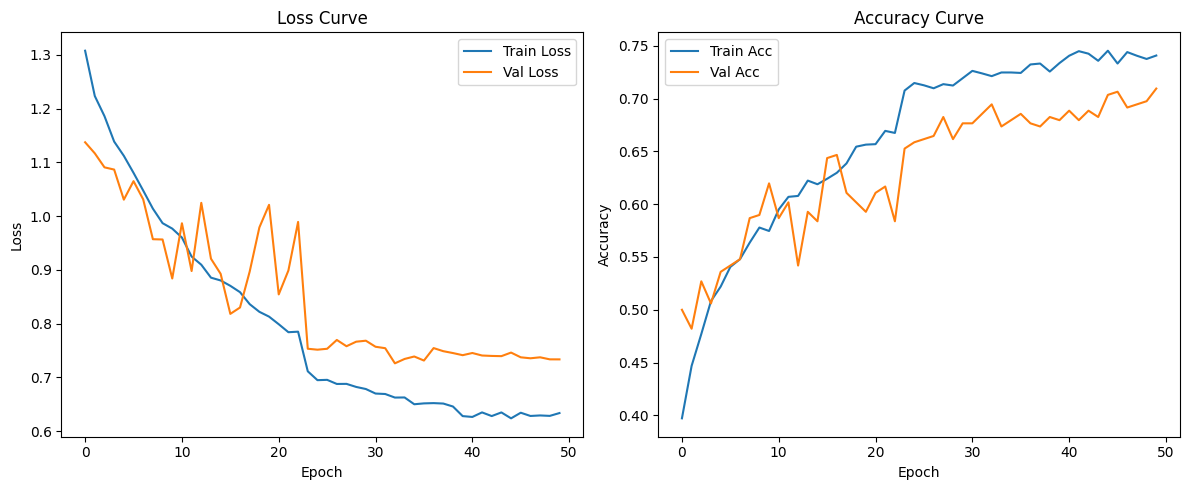

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Enhanced gMLP Layer
class gMLPLayer(nn.Module):
    def __init__(self, dim, expansion_factor=4, dropout=0.2):
        super().__init__()
        hidden_dim = int(dim * expansion_factor)

        self.norm = nn.LayerNorm(dim)
        self.channel_proj1 = nn.Linear(dim, hidden_dim)
        self.channel_proj2 = nn.Linear(hidden_dim, dim)
        self.spatial_gate = nn.Linear(dim, dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        residual = x
        x = self.norm(x)

        # Channel mixing
        x = F.gelu(self.channel_proj1(x))
        x = self.dropout(x)
        x = self.channel_proj2(x)

        # Spatial gating
        gate = torch.sigmoid(self.spatial_gate(residual))
        x = x * gate

        return residual + self.dropout(x)

# Complete ECgMLP Model
class ECgMLP(nn.Module):
    def __init__(self, in_channels=3, num_classes=4, img_size=128):
        super().__init__()

        # Convolutional stem
        self.stem = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.GELU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.GELU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        # Calculate spatial dimensions after stem
        with torch.no_grad():
            dummy = torch.zeros(1, in_channels, img_size, img_size)
            dummy = self.stem(dummy)
            self.final_height = dummy.shape[2]
            self.final_width = dummy.shape[3]
            self.out_channels = dummy.shape[1]

        # gMLP blocks
        self.gmlp_blocks = nn.Sequential(
            *[gMLPLayer(dim=self.out_channels) for _ in range(4)]
        )

        # Classifier head
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(self.out_channels, num_classes)
        )

    def forward(self, x):
        # Stem
        x = self.stem(x)

        # gMLP blocks process each spatial position independently
        B, C, H, W = x.shape
        x = x.permute(0, 2, 3, 1)  # [B, H, W, C]
        x = x.reshape(B * H * W, C)  # [B*H*W, C]

        x = self.gmlp_blocks(x)

        # Reshape back
        x = x.reshape(B, H, W, C)
        x = x.permute(0, 3, 1, 2)  # [B, C, H, W]

        # Classifier
        x = self.head(x)
        return x

# Training function with mixed precision
def train_epoch(model, loader, criterion, optimizer, device, scaler=None):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(loader, desc='Training'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Mixed precision training
        with torch.cuda.amp.autocast(enabled=scaler is not None):
            outputs = model(images)
            loss = criterion(outputs, labels)

        if scaler:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(loader)
    train_acc = correct / total
    return train_loss, train_acc

# Validation function
def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Validating'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = running_loss / len(loader)
    val_acc = correct / total

    # Classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds,
                              target_names=['EA', 'EH', 'EP', 'NE'],
                              digits=4))

    return val_loss, val_acc

# Main training pipeline
def main():
    # Initialize model, loss, optimizer
    model = ECgMLP().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=5, verbose=True)

    # Mixed precision scaler
    scaler = torch.cuda.amp.GradScaler() if device.type == 'cuda' else None

    # Training loop
    best_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(50):
        print(f"\nEpoch {epoch + 1}/50")

        # Train
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, device, scaler
        )
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        # Validate
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Update scheduler
        scheduler.step(val_acc)

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_ecgmlp.pth')
            print(f"New best model saved with val_acc: {val_acc:.4f}")

        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":


    main()

In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model
model = ECgMLP().to(device)

# Load trained weights
checkpoint_path = '/content/best_ecgmlp.pth'
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()

# Print model summary to verify
print(model)

ECgMLP(
  (stem): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate='none')
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): GELU(approximate='none')
    (7): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (gmlp_blocks): Sequential(
    (0): gMLPLayer(
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (channel_proj1): Linear(in_features=128, out_features=512, bias=True)
      (channel_proj2): Linear(in_features=512, out_features=128, bias=True)
      (spatial_gate): Linear(in_features=128, out_features=128, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
    

In [ ]:
!pip install onnx onnxruntime onnx-tf tensorflowjs --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incom

In [ ]:
import torch

# Make sure your model is loaded properly
model = ECgMLP().to(device)
model.load_state_dict(torch.load('/content/best_ecgmlp.pth', map_location=device))
model.eval()

# Export with simpler configuration
torch.onnx.export(
    model,
    torch.randn(1, 3, 128, 128).to(device),
    "ecgmlp.onnx",
    input_names=["input"],
    output_names=["output"],
    opset_version=11,  # Using older opset for better compatibility
    dynamic_axes={'input': {0: 'batch'}, 'output': {0: 'batch'}}
)

print("ONNX export completed")
!ls -lh ecgmlp.onnx

ONNX export completed
-rw-r--r-- 1 root root 2.7M Apr 22 02:35 ecgmlp.onnx


In [ ]:
# In Python, check model works correctly
import onnxruntime as ort
import numpy as np

sess = ort.InferenceSession("ecgmlp.onnx")
dummy_input = np.random.rand(1, 3, 128, 128).astype(np.float32)
outputs = sess.run(None, {"input": dummy_input})
print("Python model output:", outputs[0])

ModuleNotFoundError: No module named 'onnxruntime'